# Loan Default Probability Prediction

In [1]:
import os

import pandas as pd

In [2]:
path_to_datasets = input(f"STARTING EDA\n\n\nCurrently in directory {os.getcwd()}\n\nEnter path to datasets directory: (e.g. ./data)")
name_of_train_ds = input('Enter the name of the train dataset file with its extension (e.g. train.csv)')

os.chdir(path_to_datasets)
train_df = pd.read_csv(os.getcwd() + f'\\{name_of_train_ds}')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


## Section 1 | Exploratory Data Analysis
This section will be focused on exploring the data contained in the dataset. I'll provide comments and annotations trying to explain the behavior illustrated in the visaulization and the decisions I'm taking when manipulating data.

We will begin by outputting information or visualizations for each feature column from left to right.

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

### Section 1.1 | Exploring Single Features
This subsection is centered on extracting information from single columns (features) from the dataset. This information can help us derive strategies to fill null values, or when to drop features, what is the predominant value in the feature, etc.

In [6]:
print('Total Loan IDs in the dataset:', train_df['Loan_ID'].count())
print('Unique Loan IDs in the dataset:', train_df['Loan_ID'].nunique())

Total Loan IDs in the dataset: 614
Unique Loan IDs in the dataset: 614


Notice we have 614 unique IDs so that will be our comparison parameter to determine % of missing values.

Total count: 614
Probabilities for Male 0.7964169381107492
Probabilities for Female 0.18241042345276873
Probabilities for Unknown 0.021172638436482084


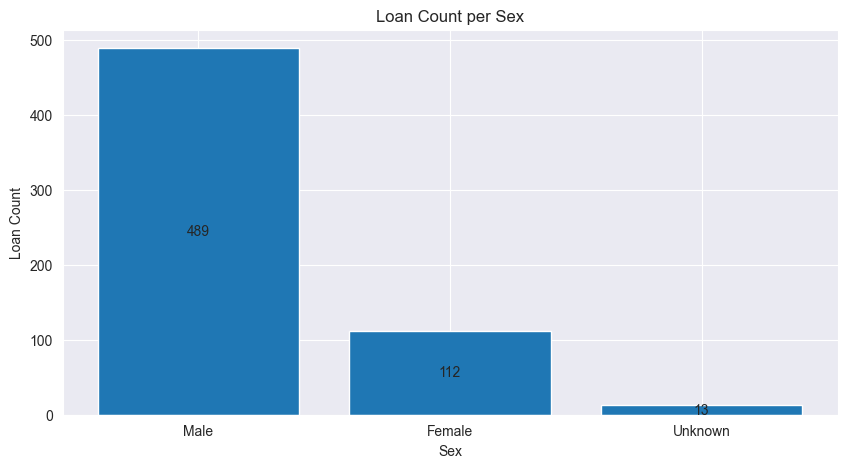

In [7]:
vals = train_df['Gender'].fillna('Unknown').value_counts()

print('Total count:', sum(vals))
for i, val in vals.items():
    print(f"Probabilities for {i} {val/sum(vals)}")

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(vals.index, vals)
plt.bar_label(bar, vals, label_type='center')
plt.xlabel('Sex')
plt.ylabel('Loan Count')
plt.title('Loan Count per Sex')
plt.show()

The first insight we can take from this bar plot is that we have an approximate ratio of 4:1 males to females taking loans in this dataset, 81.36% of the samples in the trianing dataset are males and 18.64% are females. We also have 13 missing values which we can fill with that 4:1 ratio.

Total count: 614
Probs Yes 0.6482084690553745
Probs No 0.3469055374592834
Probs Unknown 0.004885993485342019


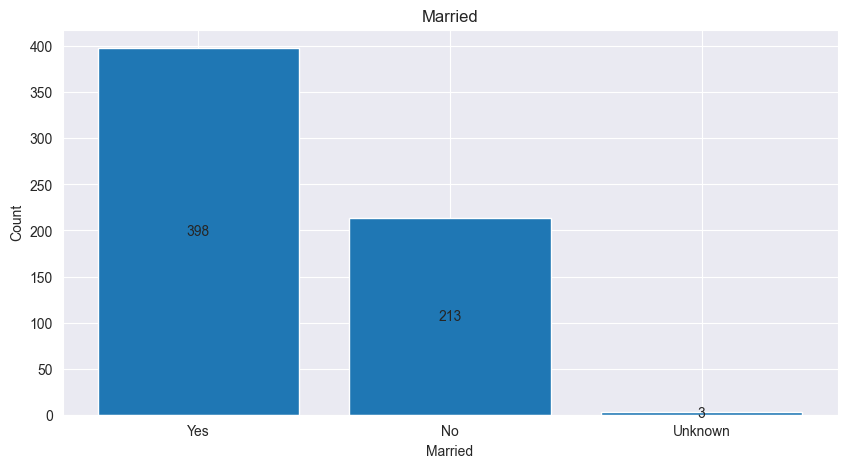

In [8]:
vals = train_df['Married'].fillna('Unknown').value_counts()
total = sum(vals)

print('Total count:', sum(vals))
for i, val in vals.items():
    print(f"Probs {i} {val/sum(vals)}")

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(vals.index, vals)
plt.bar_label(bar, vals, label_type='center')
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Married')
plt.show()

Again, we see a ratio of approximately 2:1 between people who have taken a loan and are married to those who aren't married, this ratio can be used to fill the nul values (3). This can later be combined with other information to correlate marriage to likelihood of payment.

Total count: 614
Probabilities for 0 0.5618892508143323
Probabilities for 1 0.16612377850162866
Probabilities for 2 0.16449511400651465
Probabilities for 3+ 0.08306188925081433
Probabilities for Unknown 0.024429967426710098


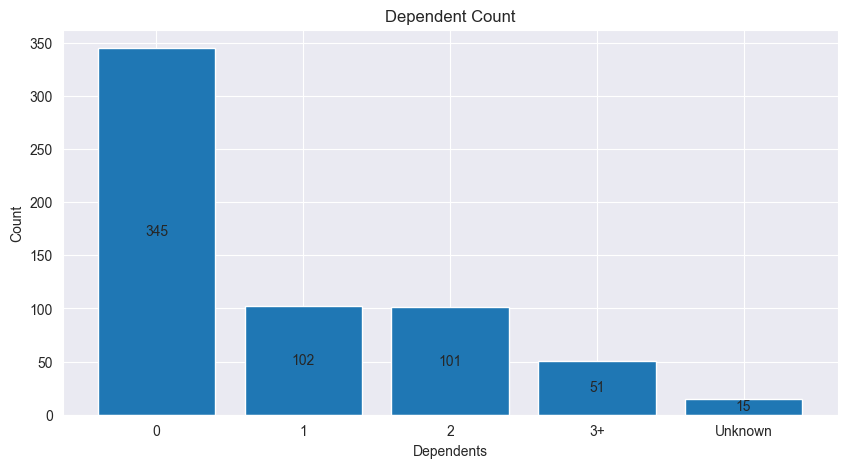

In [9]:
vals = train_df['Dependents'].fillna('Unknown').value_counts()

print('Total count:', sum(vals))
for i, val in vals.items():
    print(f"Probabilities for {i} {val/sum(vals)}")

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(vals.index, vals)
plt.bar_label(bar, vals, label_type='center')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Dependent Count')
plt.show()

Total count: 614
Probabilities for Graduate 0.7817589576547231
Probabilities for Not Graduate 0.2182410423452769


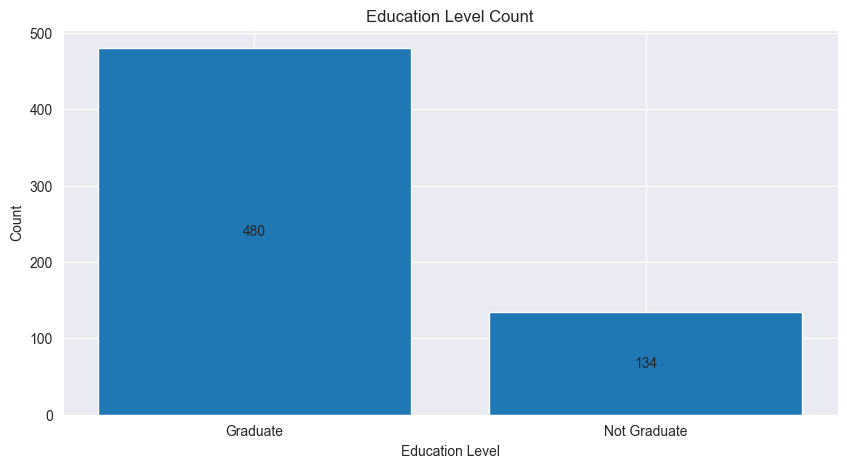

In [10]:
vals = train_df['Education'].fillna('Unknown').value_counts()

print('Total count:', sum(vals))
for i, val in vals.items():
    print(f"Probabilities for {i} {val/sum(vals)}")

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(vals.index, vals)
plt.bar_label(bar, vals, label_type='center')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Count')
plt.show()

To my surprise, we see that an overwhelming majority of the individuals have graduate studies. Let's make a hypothesis. Based  on what we see here, we could say that higher education levels lead to higher probabilities of acquiring debt (loan).

Total count: 614
Probabilities for No 0.8143322475570033
Probabilities for Yes 0.13355048859934854
Probabilities for Unknown 0.05211726384364821


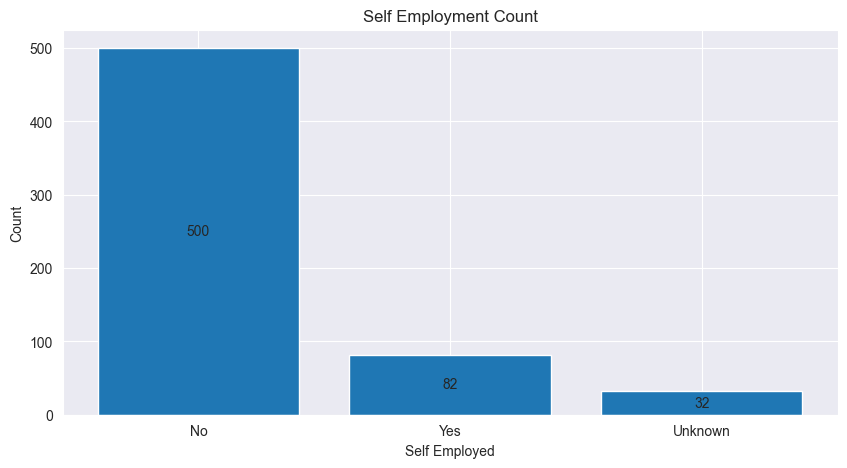

In [11]:
vals = train_df['Self_Employed'].fillna('Unknown').value_counts()

print('Total count:', sum(vals))
for i, val in vals.items():
    print(f"Probabilities for {i} {val/sum(vals)}")

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(vals.index, vals)
plt.bar_label(bar, vals, label_type='center')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.title('Self Employment Count')
plt.show()

An overwhelming majority of the samples is not self-employed, so it will be hard to associate this feature with defaulting or not on a loan.

<AxesSubplot: xlabel='ApplicantIncome', ylabel='Count'>

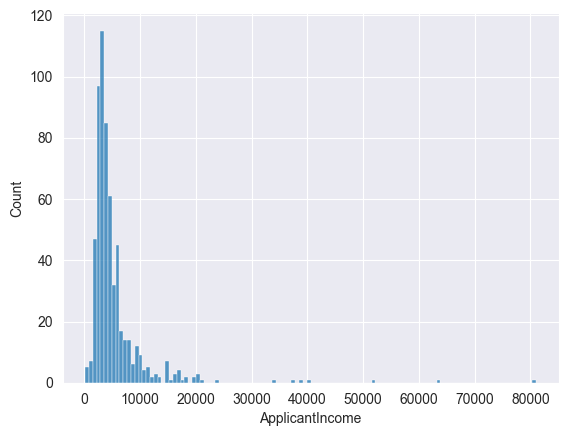

In [12]:
sns.histplot(train_df['ApplicantIncome'])

Notice we have a skewed distribution. Generally speaking, when dealing with skewed distributions the median is the best statistic to fill empty values as it is more representative of the population. However, we can use a couple of tricks to try to normalize it. For instance, the logarithmic transformation. I will show the histogram with the log transform applied, but the values in the dataframe will remain untouched. The transformation to the data will be applied in the feature engineering section.

<AxesSubplot: xlabel='ApplicantIncome', ylabel='Count'>

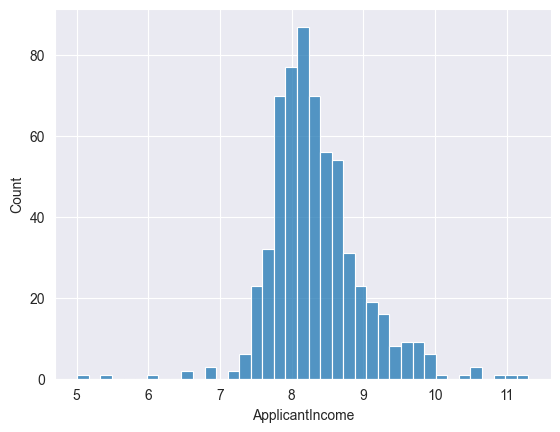

In [13]:
sns.histplot(np.log(train_df['ApplicantIncome']))

<AxesSubplot: xlabel='CoapplicantIncome', ylabel='Count'>

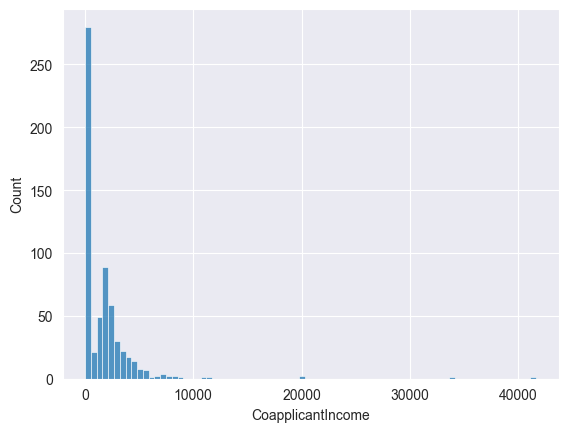

In [14]:
sns.histplot(train_df['CoapplicantIncome'])

Same story here. Skewed distribution, log transformation.

C:\Users\rmora\Documents\Cloud_Engineering\ML_Sample_Projects\classification_projects\loan_default_prediction\venv\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='CoapplicantIncome', ylabel='Count'>

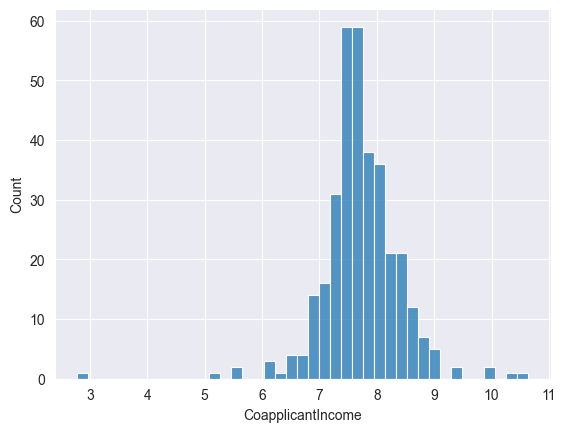

In [15]:
sns.histplot(np.log(train_df['CoapplicantIncome']))

<AxesSubplot: xlabel='LoanAmount', ylabel='Count'>

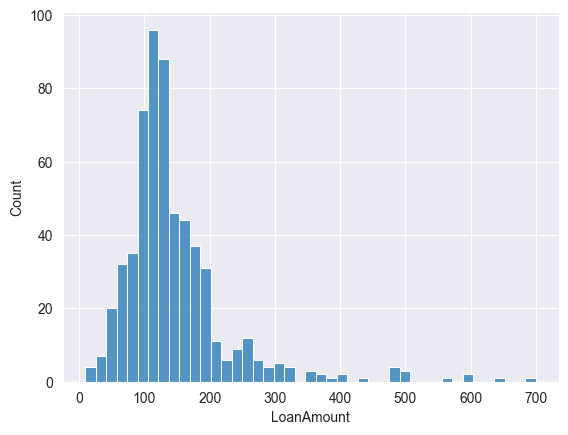

In [16]:
sns.histplot(train_df['LoanAmount'])

Same here.

<AxesSubplot: xlabel='LoanAmount', ylabel='Count'>

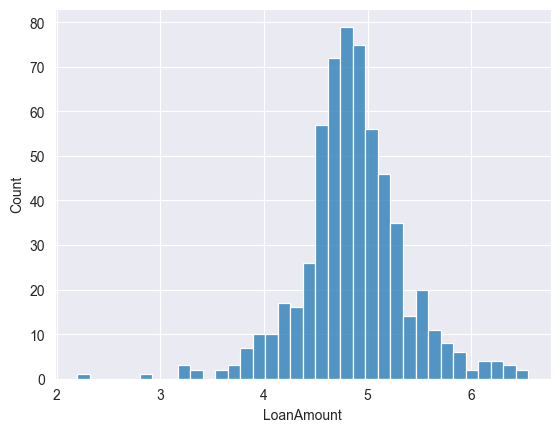

In [17]:
sns.histplot(np.log(train_df['LoanAmount']))

Total count: 614
Probabilities for 360.0 0.8338762214983714
Probabilities for 180.0 0.07166123778501629
Probabilities for 480.0 0.024429967426710098
Probabilities for Unknown 0.02280130293159609
Probabilities for 300.0 0.021172638436482084
Probabilities for 240.0 0.006514657980456026
Probabilities for 84.0 0.006514657980456026
Probabilities for 120.0 0.004885993485342019
Probabilities for 60.0 0.003257328990228013
Probabilities for 36.0 0.003257328990228013
Probabilities for 12.0 0.0016286644951140066


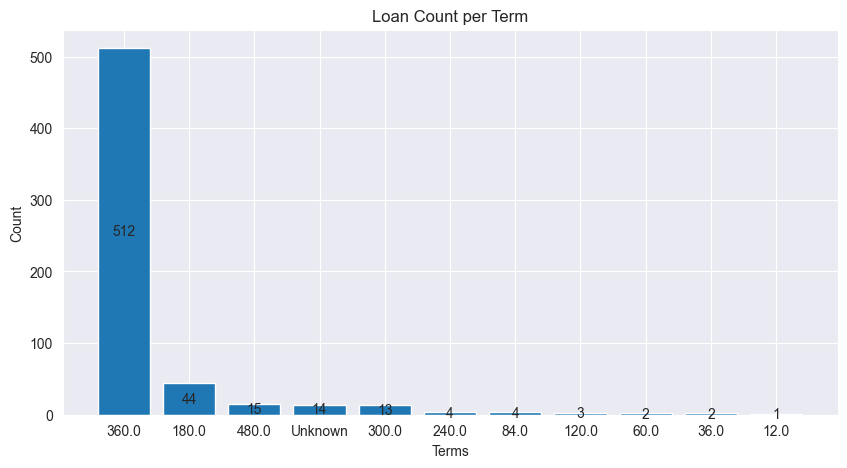

In [18]:
vals = train_df['Loan_Amount_Term'].fillna('Unknown').value_counts()

print('Total count:', sum(vals))
for i, val in vals.items():
    print(f"Probabilities for {i} {val/sum(vals)}")

fig = plt.figure(figsize=(10, 5))
bar = plt.bar([str(val) for val in vals.index], vals)
plt.bar_label(bar, vals, label_type='center')
plt.xlabel('Terms')
plt.ylabel('Count')
plt.title('Loan Count per Term')
plt.show()

In [19]:
credit_hist_labels = train_df['Credit_History'].fillna('Unknown').astype(str).unique()
credit_hist_labels

array(['1.0', '0.0', 'Unknown'], dtype=object)

Total count: 614
Probabilities for 1.0 0.7736156351791531
Probabilities for 0.0 0.1449511400651466
Probabilities for Unknown 0.08143322475570032


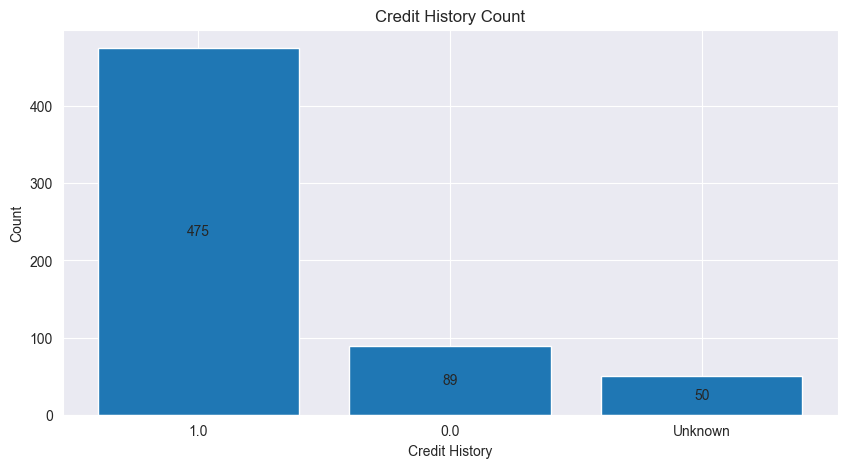

In [20]:
vals = train_df['Credit_History'].fillna('Unknown').value_counts()

print('Total count:', sum(vals))
for i, val in vals.items():
    print(f"Probabilities for {i} {val/sum(vals)}")

fig = plt.figure(figsize=(10, 5))
bar = plt.bar([str(val) for val in vals.index], vals)
plt.bar_label(bar, vals, label_type='center')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.title('Credit History Count')
plt.show()

Total count: 614
Probabilities for Semiurban 0.3794788273615635
Probabilities for Urban 0.3289902280130293
Probabilities for Rural 0.2915309446254072


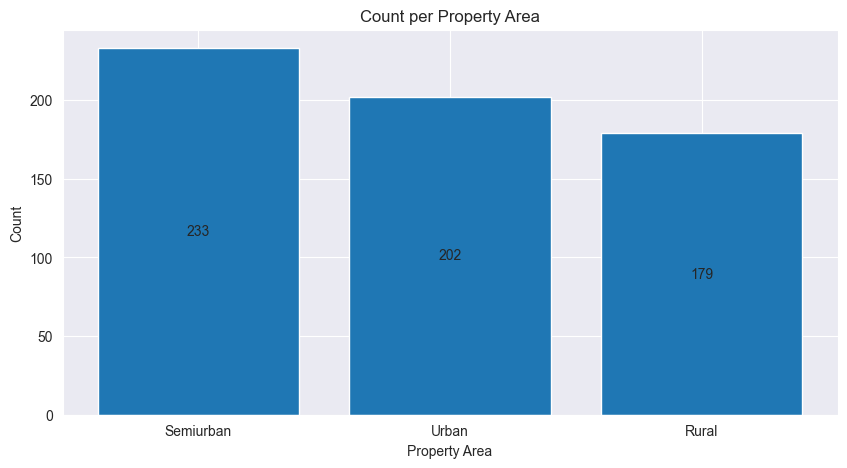

In [21]:
vals = train_df['Property_Area'].fillna('Unknown').value_counts()

print('Total count:', sum(vals))
for i, val in vals.items():
    print(f"Probabilities for {i} {val/sum(vals)}")

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(vals.index, vals)
plt.bar_label(bar, vals, label_type='center')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.title('Count per Property Area')
plt.show()

Notice that the difference in number of samples between the three classes is within 5% to 8.7%. I would say this data on its own is inconclusive, so we cannot yet derive a hypothesis like a person is more likey to get a loan for a property in an urban area.

Total count: 614
Probabilities for Y 0.6872964169381107
Probabilities for N 0.3127035830618892


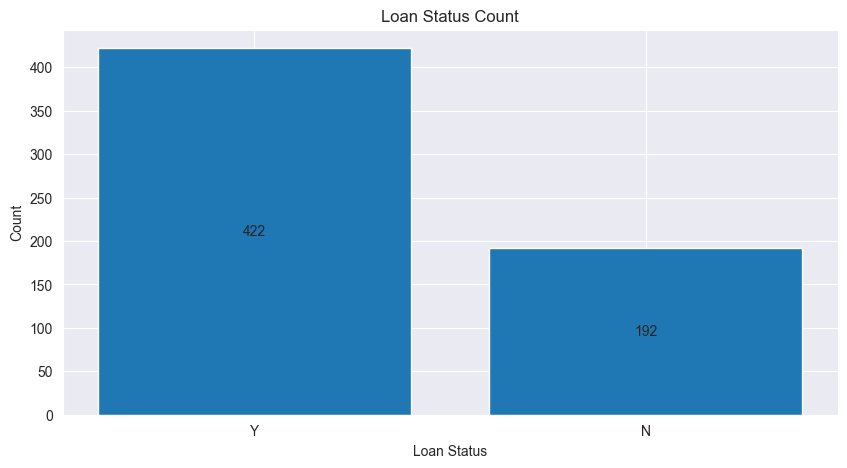

In [22]:
vals = train_df['Loan_Status'].fillna('Unknown').value_counts()

print('Total count:', sum(vals))
for i, val in vals.items():
    print(f"Probabilities for {i} {val/sum(vals)}")

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(vals.index, vals)
plt.bar_label(bar, vals, label_type='center')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Count')
plt.show()

This is the label we will try to predict. Notice that we have an unbalanced dataset. What do I mean by unbalanced? Simply that there are significantly more samples of the class **Yes** than the class **No**. Unbalanced datasets lead to biased and "unfair" models because they are more precise, overfitted and whatnot to use in production. To deal with this problem we have several options:
1. Use some data augmentation technique to artificially increase the sample of the **No** class.
2. Increase the weight of **No** class samples during training.
3. Focus on metrics like precision, recall and F1 score rather than accuracy.

### Section 1.2 | Exploring visualizations of combined features
This section is focused on visualizing information by crossing data from features. These may help test hypotheses, uncover correlations and patterns in data.

<AxesSubplot: xlabel='Property_Area', ylabel='LoanAmount'>

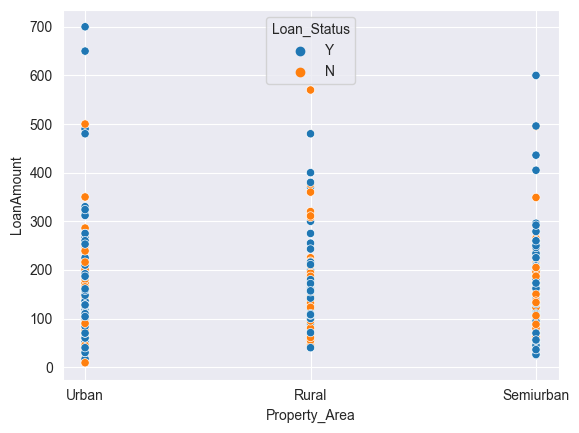

In [23]:
sns.scatterplot(x=train_df['Property_Area'], y=train_df['LoanAmount'], hue=train_df['Loan_Status'])

<AxesSubplot: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

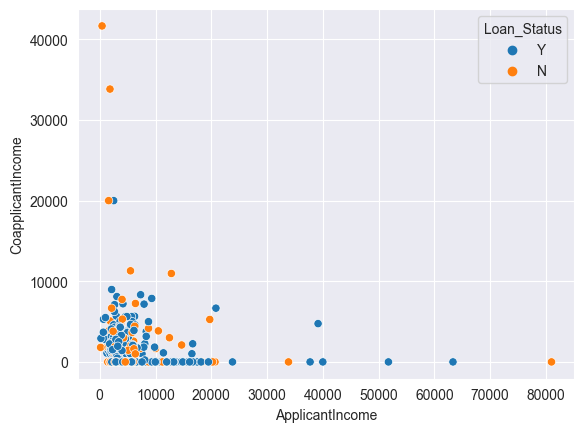

In [24]:
sns.scatterplot(x=train_df['ApplicantIncome'], y=train_df['CoapplicantIncome'], hue=train_df['Loan_Status'])

<AxesSubplot: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

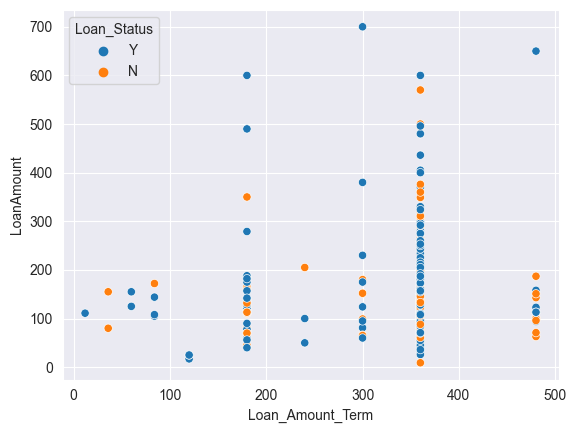

In [25]:
sns.scatterplot(x=train_df['Loan_Amount_Term'], y=train_df['LoanAmount'], hue=train_df['Loan_Status'])

<AxesSubplot: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

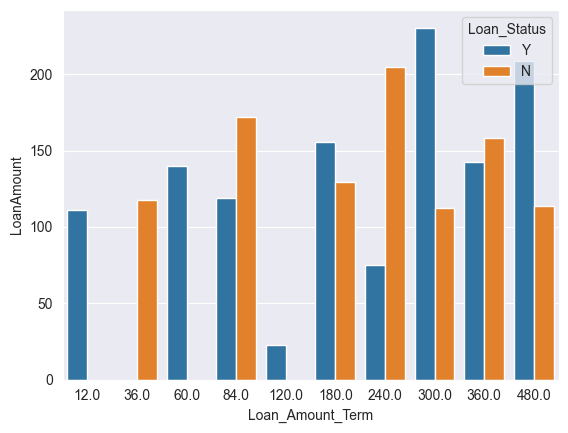

In [26]:
sns.barplot(x=train_df['Loan_Amount_Term'], y=train_df['LoanAmount'], hue=train_df['Loan_Status'], errorbar=None)

<AxesSubplot: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

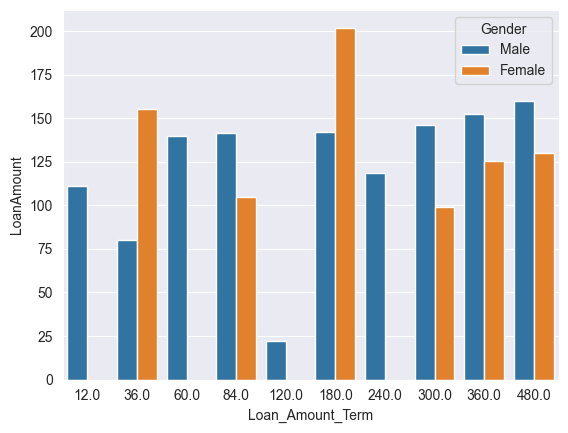

In [27]:
sns.barplot(x=train_df['Loan_Amount_Term'], y=train_df['LoanAmount'], hue=train_df['Gender'], errorbar=None)

## Section 2 | Data Preprocessing
This section is focused on dealing with empty values and cleaning data.

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [29]:
print('Currently in directory:', os.getcwd())
path_to_datasets = input(f"STARTING DATA PREPROCESSING\n\n\nCurrently in directory {os.getcwd()}\n\nEnter path to dataset directory: (e.g. ./data)")
name_of_train_ds = input('Enter the name of the train dataset file with its extension (e.g. train.csv)')

os.chdir(path_to_datasets)
train_df = pd.read_csv(os.getcwd() + f'\\{name_of_train_ds}')
train_df.head(10)

Currently in directory: C:\Users\rmora\Documents\Cloud_Engineering\ML_Sample_Projects\classification_projects\loan_default_prediction\data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


We have to deal with all null values present in the features below.

In [30]:
train_df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

We will use the probabilities we computed before to randomly fill the empty values in each of the following features:
1. Credit History
2. Self Employed
3. Loan Amount
4. Dependents
5. Loan Amount Term
6. Gender
7. Married

In [31]:
train_df['Credit_History'] = train_df['Credit_History'].fillna(np.random.choice([1.0, 0.0], p=[0.84, 0.16])).astype(float)
train_df['Credit_History'].isnull().sum()

0

In [32]:
train_df['Self_Employed'] = train_df['Self_Employed'].fillna(np.random.choice(['No', 'Yes'], p=[0.81, 0.19]))
train_df['Self_Employed'].isnull().sum()

0

In [33]:
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].median())
train_df['LoanAmount'].isnull().sum()

0

In [34]:
train_df['Dependents'] = train_df['Dependents'].fillna(np.random.choice(['0', '1', '2', '3+'], p=[0.59, 0.17, 0.16, 0.08]))
train_df['Dependents'] = train_df['Dependents'].str.replace('+', '')
train_df['Dependents'].isnull().sum()

C:\Users\rmora\AppData\Local\Temp\ipykernel_6124\1420640925.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_df['Dependents'] = train_df['Dependents'].str.replace('+', '')


0

In [35]:
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(np.random.choice([360.0, 180.0, 480.0, 300.0, 240.0, 84.0, 120.0, 60.0, 36.0, 12.0], p=[0.83, 0.07, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.005, 0.005])).astype(float)
train_df['Loan_Amount_Term'].isnull().sum()

0

In [36]:
train_df['Gender'] = train_df['Gender'].fillna(np.random.choice(['Male', 'Female'], p=[0.81, 0.19]))
train_df['Gender'].isnull().sum()

0

In [37]:
train_df['Married'] = train_df['Married'].fillna(np.random.choice(['No', 'Yes'], p=[0.65, 0.35]))
train_df['Married'].isnull().sum()

0

Now, let's check our work. We will plot the modified features and in theory the proportions should be somewhat the same (of course there a randomness to the empty data filling).

Total count: 614
Probabilities for 1.0 0.8550488599348535
Probabilities for 0.0 0.1449511400651466


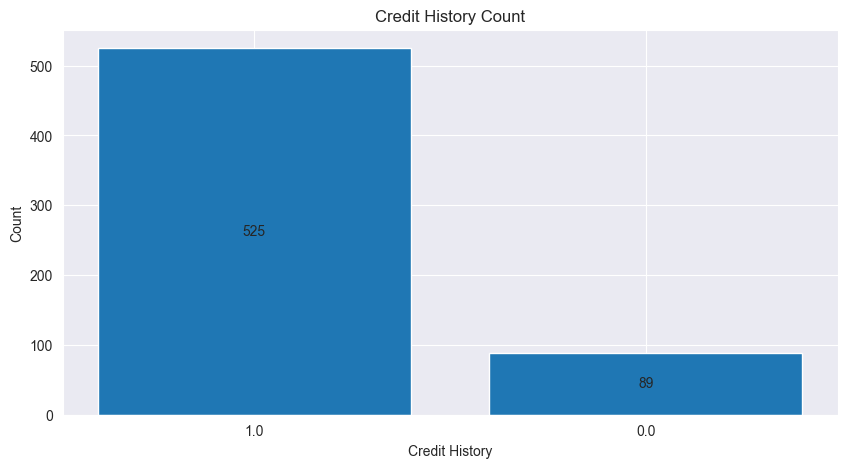

In [38]:
vals = train_df['Credit_History'].fillna('Unknown').value_counts()

print('Total count:', sum(vals))
for i, val in vals.items():
    print(f"Probabilities for {i} {val/sum(vals)}")

fig = plt.figure(figsize=(10, 5))
bar = plt.bar([str(val) for val in vals.index], vals)
plt.bar_label(bar, vals, label_type='center')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.title('Credit History Count')
plt.show()

Total count: 614
Probabilities for No 0.8143322475570033
Probabilities for Yes 0.18566775244299674


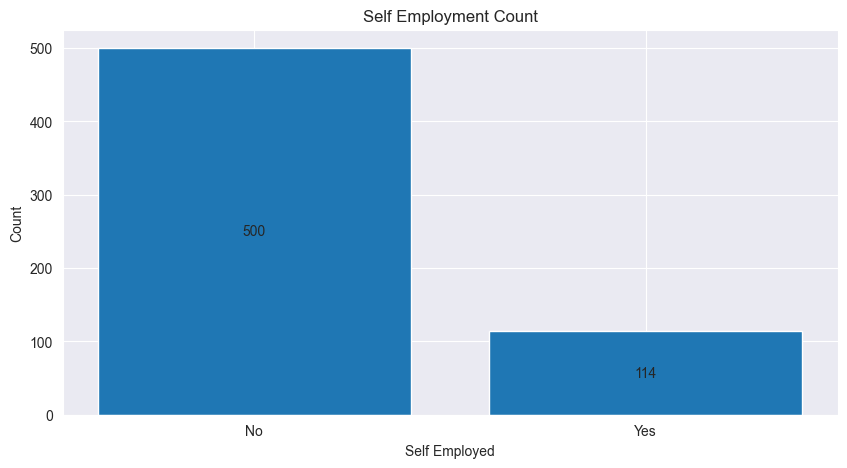

In [39]:
vals = train_df['Self_Employed'].fillna('Unknown').value_counts()

print('Total count:', sum(vals))
for i, val in vals.items():
    print(f"Probabilities for {i} {val/sum(vals)}")

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(vals.index, vals)
plt.bar_label(bar, vals, label_type='center')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.title('Self Employment Count')
plt.show()

<AxesSubplot: xlabel='LoanAmount', ylabel='Count'>

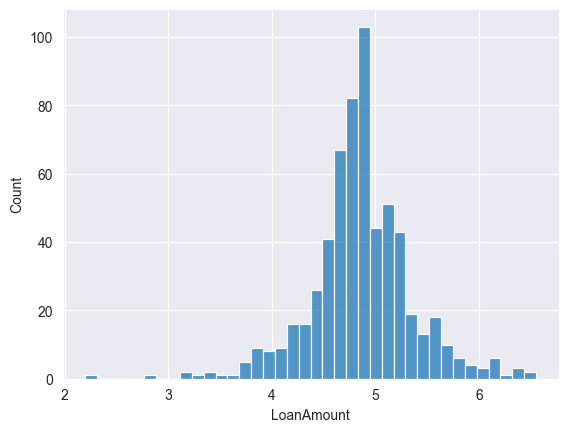

In [40]:
sns.histplot(np.log(train_df['LoanAmount']))

Total count: 614
Probabilities for 0 0.5863192182410424
Probabilities for 1 0.16612377850162866
Probabilities for 2 0.16449511400651465
Probabilities for 3 0.08306188925081433


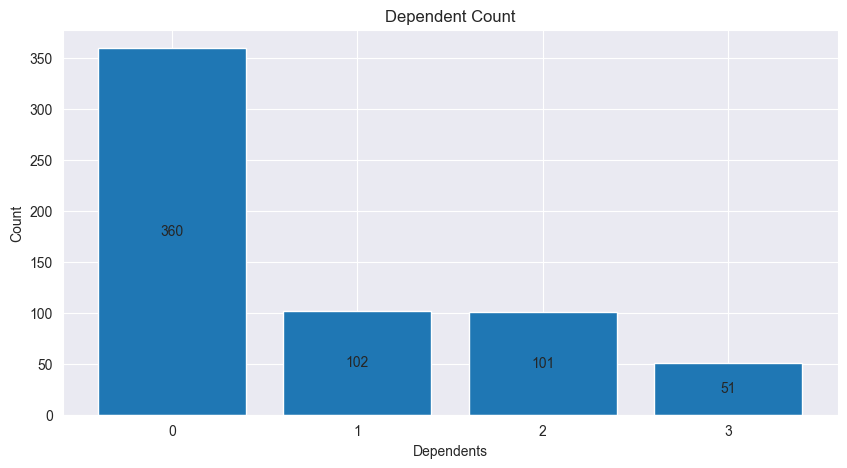

In [41]:
vals = train_df['Dependents'].fillna('Unknown').value_counts()

print('Total count:', sum(vals))
for i, val in vals.items():
    print(f"Probabilities for {i} {val/sum(vals)}")

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(vals.index, vals)
plt.bar_label(bar, vals, label_type='center')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Dependent Count')
plt.show()

Total count: 614
Probabilities for 360.0 0.8566775244299675
Probabilities for 180.0 0.07166123778501629
Probabilities for 480.0 0.024429967426710098
Probabilities for 300.0 0.021172638436482084
Probabilities for 240.0 0.006514657980456026
Probabilities for 84.0 0.006514657980456026
Probabilities for 120.0 0.004885993485342019
Probabilities for 60.0 0.003257328990228013
Probabilities for 36.0 0.003257328990228013
Probabilities for 12.0 0.0016286644951140066


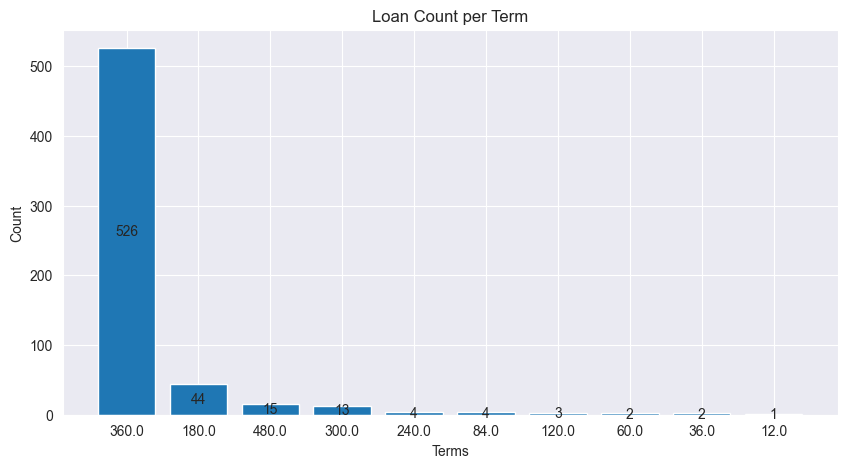

In [42]:
vals = train_df['Loan_Amount_Term'].fillna('Unknown').value_counts()

print('Total count:', sum(vals))
for i, val in vals.items():
    print(f"Probabilities for {i} {val/sum(vals)}")

fig = plt.figure(figsize=(10, 5))
bar = plt.bar([str(val) for val in vals.index], vals)
plt.bar_label(bar, vals, label_type='center')
plt.xlabel('Terms')
plt.ylabel('Count')
plt.title('Loan Count per Term')
plt.show()

Total count: 614
Probabilities for Male 0.8175895765472313
Probabilities for Female 0.18241042345276873


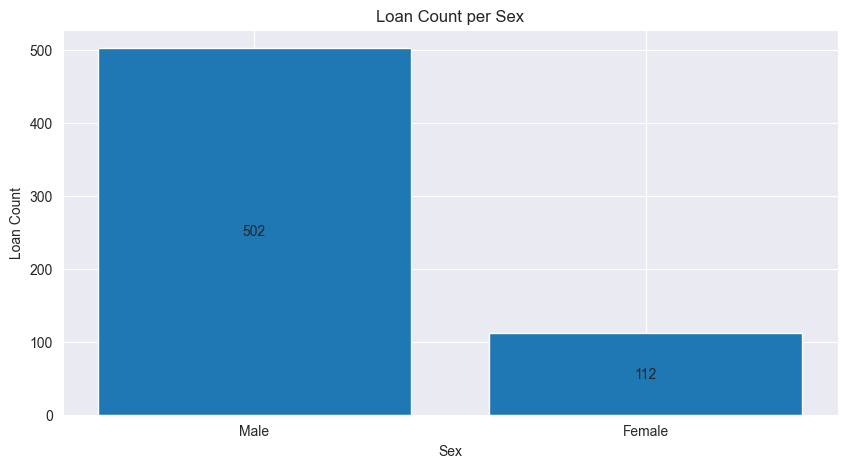

In [43]:
vals = train_df['Gender'].fillna('Unknown').value_counts()

print('Total count:', sum(vals))
for i, val in vals.items():
    print(f"Probabilities for {i} {val/sum(vals)}")

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(vals.index, vals)
plt.bar_label(bar, vals, label_type='center')
plt.xlabel('Sex')
plt.ylabel('Loan Count')
plt.title('Loan Count per Sex')
plt.show()

Total count: 614
Probs Yes 0.6482084690553745
Probs No 0.3517915309446254


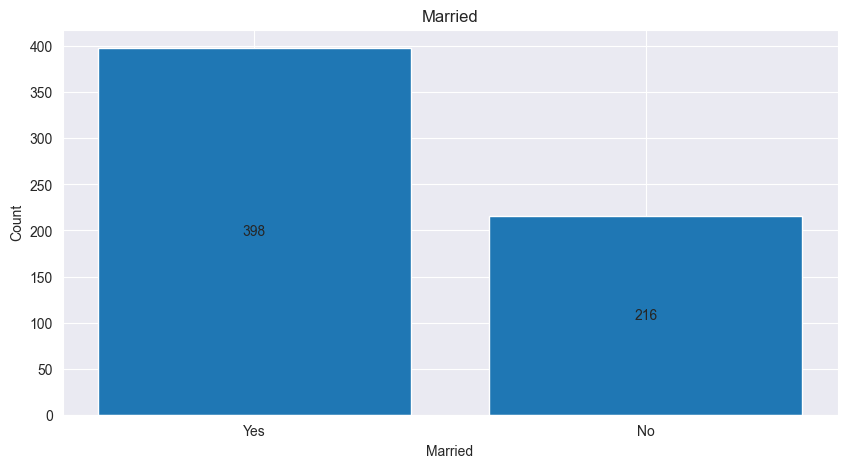

In [44]:
vals = train_df['Married'].fillna('Unknown').value_counts()
total = sum(vals)

print('Total count:', sum(vals))
for i, val in vals.items():
    print(f"Probs {i} {val/sum(vals)}")

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(vals.index, vals)
plt.bar_label(bar, vals, label_type='center')
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Married')
plt.show()

To finalize this section, we will store the processed data into a new CSV file.

In [45]:
train_df.to_csv('train_processed.csv', index=False)

## Section 3 | Feature Engineering
This section is dedicated to feature manipulation and transformation as well as deriving new features from existing ones. Some examples of the procedures we will take on are:

* Encoding non-numeric features
* Multiply related features to create a new one
* Apply tranformations to skewed distributions to "normalize" them.

In [46]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
path_to_datasets = input(f"STARTING FEATURE ENGINEERING\n\n\nCurrently in directory {os.getcwd()}\n\nEnter path to preprocessed dataset directory: (e.g. ./data)")
name_of_train_ds = input('Enter the name of the preprocessed train dataset file with its extension (e.g. train_preprocessed.csv)')

os.chdir(path_to_datasets)
train_df = pd.read_csv(os.getcwd() + f'\\{name_of_train_ds}')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


Here we will create a copy of our train dataframe which will undergo the transformations to become a features dataset.

In [49]:
features_df = train_df.copy(deep=True)
features_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Encoding string value features. Please note that this is perhaps a very arbitrary choice for the encoding values and simply swapping them may produce improvements.

In [50]:
features_df['Gender'] = features_df['Gender'].map({'Male': 0, 'Female': 1})
features_df['Married'] = features_df['Married'].map({'No': 0, 'Yes': 1})
features_df['Education'] = features_df['Education'].map({'Not Graduate': 0, 'Graduate': 1})
features_df['Property_Area'] = features_df['Property_Area'].map({'Urban': 0, 'Semiurban': 1, 'Rural': 2})
features_df['Loan_Status'] = features_df['Loan_Status'].map({'N': 0, 'Y': 1})
features_df['Self_Employed'] = features_df['Self_Employed'].map({'No': 0, 'Yes': 1})

In [51]:
features_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1


In [52]:
features_df['Total_Income'] = features_df['ApplicantIncome'] + features_df['CoapplicantIncome']

In [53]:
features_df['Total_Income'] = np.log(features_df['Total_Income'])
features_df['LoanAmount'] = np.log(features_df['LoanAmount'])

In [54]:
features_df.drop(['Loan_ID'], axis=1, inplace=True)

In [55]:
features_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,0,0,1,0,5849,0.0,4.852030,360.0,1.0,0,1,8.674026
1,0,1,1,1,0,4583,1508.0,4.852030,360.0,1.0,2,0,8.714568
2,0,1,0,1,1,3000,0.0,4.189655,360.0,1.0,0,1,8.006368
3,0,1,0,0,0,2583,2358.0,4.787492,360.0,1.0,0,1,8.505323
4,0,0,0,1,0,6000,0.0,4.948760,360.0,1.0,0,1,8.699515


<AxesSubplot: >

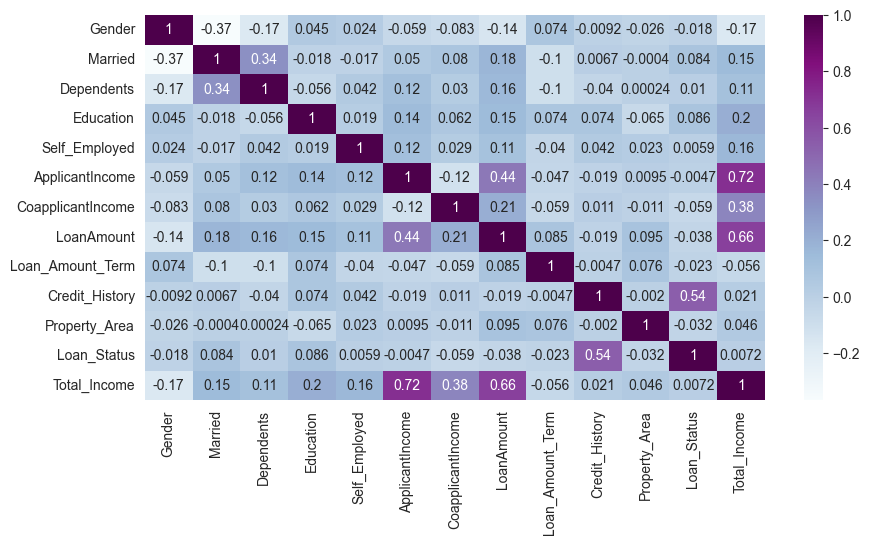

In [56]:
fig = plt.figure(figsize=(10, 5))
sns.heatmap(features_df.corr(), cmap='BuPu', annot=True)

To finalize this section, we will store the features dataframe into a CSV.

In [57]:
features_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,0,0,1,0,5849,0.0,4.852030,360.0,1.0,0,1,8.674026
1,0,1,1,1,0,4583,1508.0,4.852030,360.0,1.0,2,0,8.714568
2,0,1,0,1,1,3000,0.0,4.189655,360.0,1.0,0,1,8.006368
3,0,1,0,0,0,2583,2358.0,4.787492,360.0,1.0,0,1,8.505323
4,0,0,0,1,0,6000,0.0,4.948760,360.0,1.0,0,1,8.699515


In [58]:
features_df.isnull().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [59]:
features_df.to_csv('features.csv', index=False)

## Section 4 | Model Training
This section is focused on training several models using different sets of features and algorithms. Our challenge consists in training a model using strictly classical ML algorithms, hence we will rely on **xgboost** and **sklearn** to build our models. When dealing with tabular data gradient boosted algorithms tend to be the best performers, so we will employ decision trees, random forests and their gradient boosted versions and finally compare these to an extreme boosted classifier.

In [60]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
path_to_datasets = input(f"STARTING MODEL TRAINING\n\n\nCurrently in directory {os.getcwd()}\n\nEnter path to the features dataset directory: (e.g. ./data)")
name_of_features_ds = input('Enter the name of the features dataset file with its extension (e.g. features.csv)')

os.chdir(path_to_datasets)
features_df = pd.read_csv(os.getcwd() + f'\\{name_of_features_ds}')
features_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,0,0,1,0,5849,0.0,4.852030,360.0,1.0,0,1,8.674026
1,0,1,1,1,0,4583,1508.0,4.852030,360.0,1.0,2,0,8.714568
2,0,1,0,1,1,3000,0.0,4.189655,360.0,1.0,0,1,8.006368
3,0,1,0,0,0,2583,2358.0,4.787492,360.0,1.0,0,1,8.505323
4,0,0,0,1,0,6000,0.0,4.948760,360.0,1.0,0,1,8.699515


In [62]:
X = features_df.drop(['Loan_Status'], axis=1)
y = features_df['Loan_Status']
X.shape, y.shape

((614, 12), (614,))

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25 , random_state=132)

C:\Users\rmora\Documents\Cloud_Engineering\ML_Sample_Projects\classification_projects\loan_default_prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rmora\Documents\Cloud_Engineering\ML_Sample_Projects\classification_projects\loan_default_prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/p

Accuracy 0.7857142857142857
Cross validation mean [0.81300813 0.7804878  0.7804878  0.85365854 0.81147541]
               precision    recall  f1-score   support

    Defaulted       0.86      0.38      0.52        48
Not Defaulted       0.77      0.97      0.86       106

     accuracy                           0.79       154
    macro avg       0.82      0.67      0.69       154
 weighted avg       0.80      0.79      0.76       154



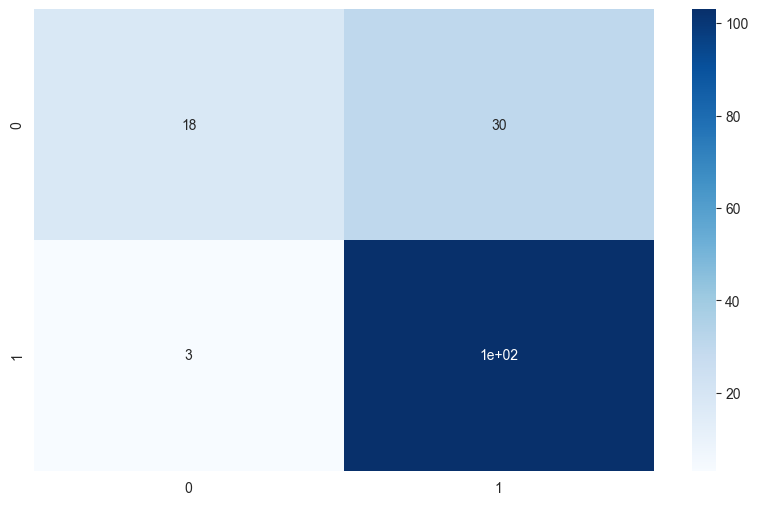

In [64]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = model.score(X_test, y_test)
cross_val = cross_val_score(model, X, y, cv=5)

print('Accuracy', acc)
print("Cross validation mean", cross_val)

conf_matrix = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')

class_rep = classification_report(y_test, y_pred, target_names=['Defaulted', 'Not Defaulted'])
print(class_rep)

Accuracy 0.7337662337662337
Cross validation mean [0.73170732 0.71544715 0.77235772 0.76422764 0.71311475]
               precision    recall  f1-score   support

    Defaulted       0.59      0.48      0.53        48
Not Defaulted       0.78      0.85      0.81       106

     accuracy                           0.73       154
    macro avg       0.69      0.66      0.67       154
 weighted avg       0.72      0.73      0.73       154



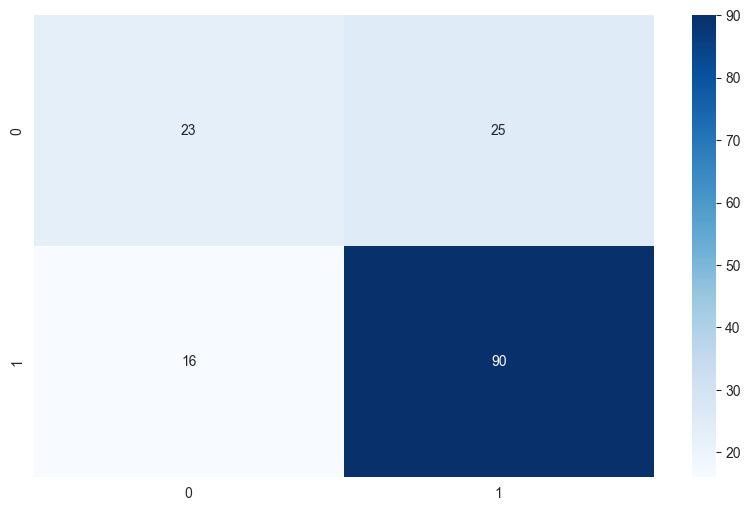

In [65]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = model.score(X_test, y_test)
cross_val = cross_val_score(model, X, y, cv=5)

print('Accuracy', acc)
print("Cross validation mean", cross_val)

conf_matrix = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')

class_rep = classification_report(y_test, y_pred, target_names=['Defaulted', 'Not Defaulted'])
print(class_rep)

Accuracy 0.7857142857142857
Cross validation mean [0.81300813 0.7804878  0.7804878  0.85365854 0.81967213]
               precision    recall  f1-score   support

    Defaulted       0.86      0.38      0.52        48
Not Defaulted       0.77      0.97      0.86       106

     accuracy                           0.79       154
    macro avg       0.82      0.67      0.69       154
 weighted avg       0.80      0.79      0.76       154



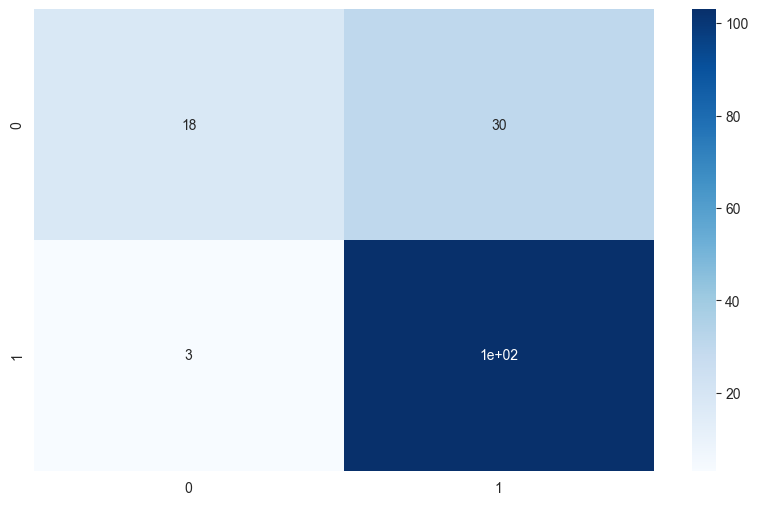

In [66]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = model.score(X_test, y_test)
cross_val = cross_val_score(model, X, y, cv=5)

print('Accuracy', acc)
print("Cross validation mean", cross_val)

conf_matrix = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')

class_rep = classification_report(y_test, y_pred, target_names=['Defaulted', 'Not Defaulted'])
print(class_rep)

Accuracy 0.8051948051948052
Cross validation mean [0.7398374  0.77235772 0.79674797 0.78861789 0.74590164]
               precision    recall  f1-score   support

    Defaulted       0.76      0.54      0.63        48
Not Defaulted       0.82      0.92      0.87       106

     accuracy                           0.81       154
    macro avg       0.79      0.73      0.75       154
 weighted avg       0.80      0.81      0.79       154



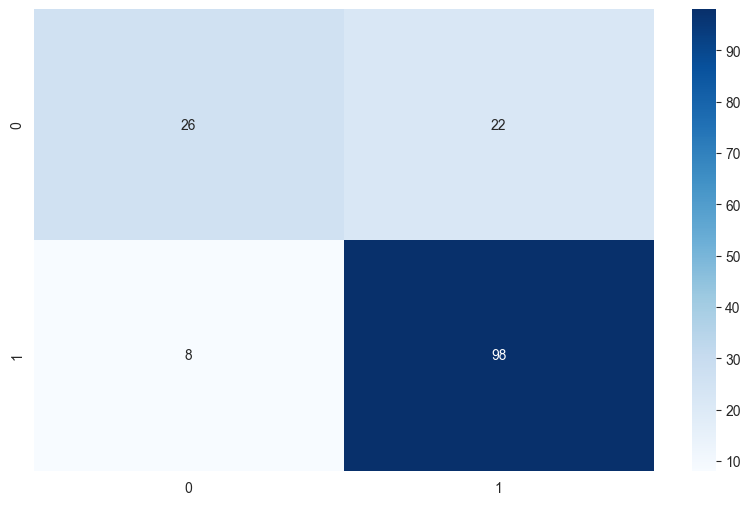

In [67]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = model.score(X_test, y_test)
cross_val = cross_val_score(model, X, y, cv=5)

print('Accuracy', acc)
print("Cross validation mean", cross_val)

conf_matrix = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')

class_rep = classification_report(y_test, y_pred, target_names=['Defaulted', 'Not Defaulted'])
print(class_rep)

## Section 5 | Hyperparameter Tunning


Accuracy 0.6883116883116883
Cross validation mean [0.69105691 0.69105691 0.68292683 0.68292683 0.68852459]
               precision    recall  f1-score   support

    Defaulted       0.00      0.00      0.00        48
Not Defaulted       0.69      1.00      0.82       106

     accuracy                           0.69       154
    macro avg       0.34      0.50      0.41       154
 weighted avg       0.47      0.69      0.56       154



C:\Users\rmora\Documents\Cloud_Engineering\ML_Sample_Projects\classification_projects\loan_default_prediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmora\Documents\Cloud_Engineering\ML_Sample_Projects\classification_projects\loan_default_prediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmora\Documents\Cloud_Engineering\ML_Sample_Projects\classification_projects\loan_default_prediction\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricW

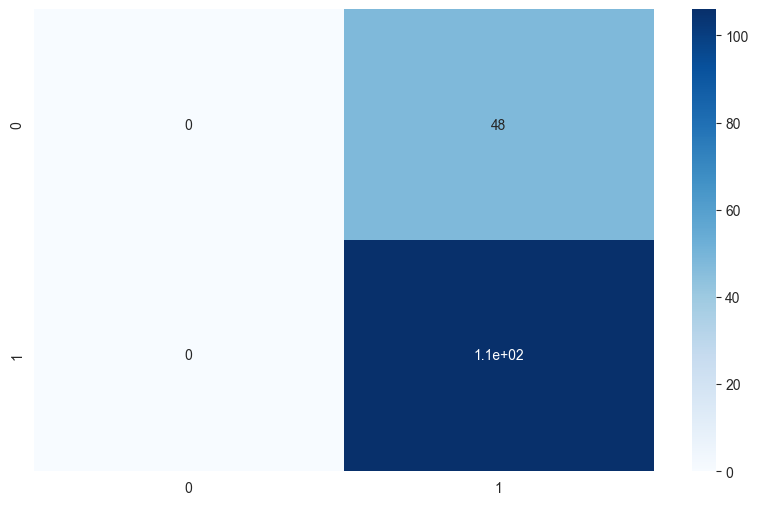

In [74]:
model = LogisticRegression(C=0.001, solver='newton-cholesky', class_weight={0: 1, 1: 1}, max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = model.score(X_test, y_test)
cross_val = cross_val_score(model, X, y, cv=5)

print('Accuracy', acc)
print("Cross validation mean", cross_val)

conf_matrix = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')

class_rep = classification_report(y_test, y_pred, target_names=['Defaulted', 'Not Defaulted'])
print(class_rep)

Accuracy 0.7857142857142857
Cross validation mean [0.81300813 0.76422764 0.78861789 0.83739837 0.81147541]
               precision    recall  f1-score   support

    Defaulted       0.86      0.38      0.52        48
Not Defaulted       0.77      0.97      0.86       106

     accuracy                           0.79       154
    macro avg       0.82      0.67      0.69       154
 weighted avg       0.80      0.79      0.76       154



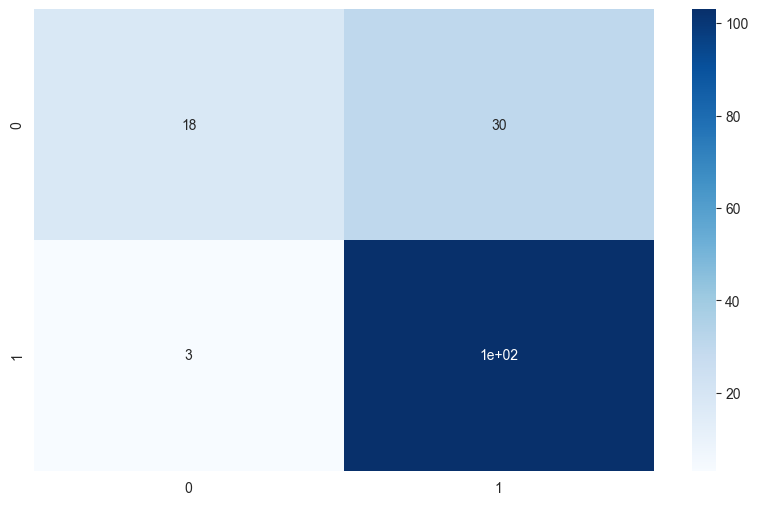

In [86]:
model = LogisticRegression(C=0.5, solver='lbfgs', class_weight={0: 1.5, 1: 1}, max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = model.score(X_test, y_test)
cross_val = cross_val_score(model, X, y, cv=5)

print('Accuracy', acc)
print("Cross validation mean", cross_val)

conf_matrix = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')

class_rep = classification_report(y_test, y_pred, target_names=['Defaulted', 'Not Defaulted'])
print(class_rep)